In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf


In [5]:
mnist = tf.keras.datasets.mnist

In [16]:
(x_train,y_train) , (x_test , y_test) = mnist.load_data()
x_train = x_train/255
x_test = x_test/255

In [17]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dropout(.2),
    tf.keras.layers.Dense(10,activation="softmax")
])

In [19]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [20]:
r = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2964 - accuracy: 0.9136 - val_loss: 0.1384 - val_accuracy: 0.9589
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1411 - accuracy: 0.9585 - val_loss: 0.1031 - val_accuracy: 0.9687
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1066 - accuracy: 0.9678 - val_loss: 0.0816 - val_accuracy: 0.9740
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0857 - accuracy: 0.9729 - val_loss: 0.0759 - val_accuracy: 0.9764
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0742 - accuracy: 0.9774 - val_loss: 0.0774 - val_accuracy: 0.9764
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0654 - accuracy: 0.9792 - val_loss: 0.0661 - val_accuracy: 0.9784
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0567 - accuracy: 0.9816 - val_loss: 0.0724 - val_accuracy:

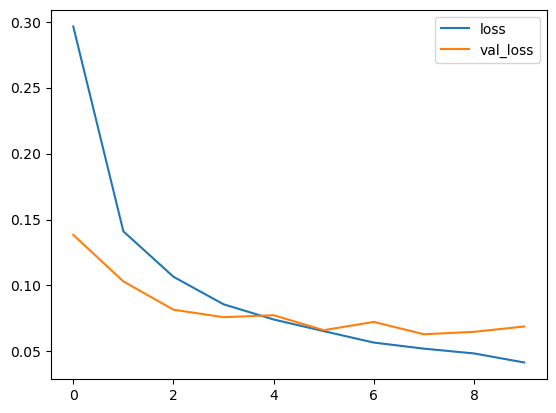

In [30]:
#ploting loss and Accuracy graph
plt.plot(r.history["loss"],label="loss");
plt.plot(r.history["val_loss"],label="val_loss");
plt.legend();

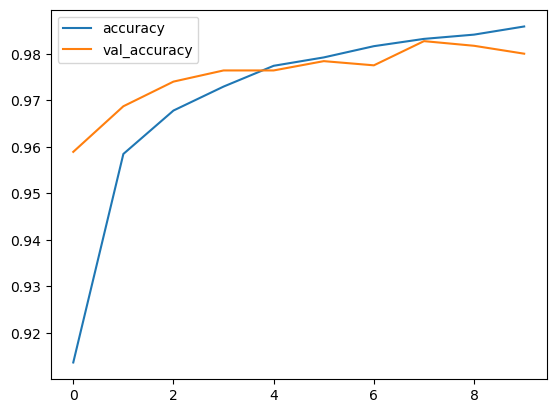

In [32]:
plt.plot(r.history["accuracy"],label="accuracy")
plt.plot(r.history["val_accuracy"],label="val_accuracy")
plt.legend();

In [56]:
from sklearn.metrics import confusion_matrix
p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test,p_test)
cm

313/313 [==============================] - 0s 1ms/step


array([[ 968,    1,    1,    1,    0,    1,    3,    1,    2,    2],
       [   0, 1121,    3,    3,    0,    1,    2,    1,    4,    0],
       [   3,    1, 1003,    2,    4,    0,    1,    8,   10,    0],
       [   0,    0,    3,  996,    1,    2,    0,    4,    2,    2],
       [   1,    0,    2,    0,  966,    0,    2,    2,    0,    9],
       [   3,    0,    0,   10,    1,  870,    5,    1,    2,    0],
       [   2,    3,    0,    1,    4,    2,  943,    0,    3,    0],
       [   1,    5,    7,    1,    0,    0,    0, 1012,    0,    2],
       [   3,    0,    3,    5,    6,    4,    2,    4,  944,    3],
       [   0,    3,    0,    5,    9,    5,    0,    9,    1,  977]],
      dtype=int64)

Text(0.5, 1.0, 'True Label : 9 Predicted : 3 ')

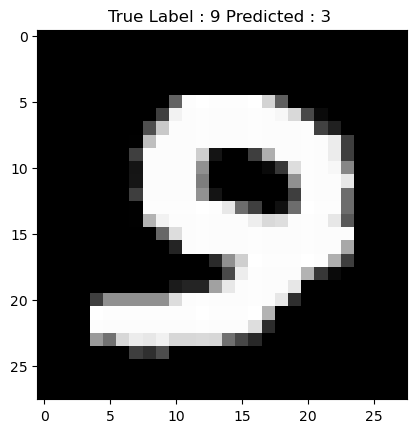

In [75]:
# show some  misclassified examples
missclassified_example = np.where(p_test != y_test)[0]
i= np.random.choice(missclassified_example)
plt.imshow(x_test[i] , cmap='gray')
plt.title("True Label : %s Predicted : %s " % (y_test[i],p_test[i]))

In [ ]:
# This 